In [2]:
%matplotlib inline


# Karate Club

Zachary's Karate Club graph

Data file from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

Zachary W. (1977).
An information flow model for conflict and fission in small groups.
Journal of Anthropological Research, 33, 452-473.


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
G = nx.karate_club_graph()
print("Node Degree")

for v in G:
    print(f"{v:4} {G.degree(v):6}")

#print(G)

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


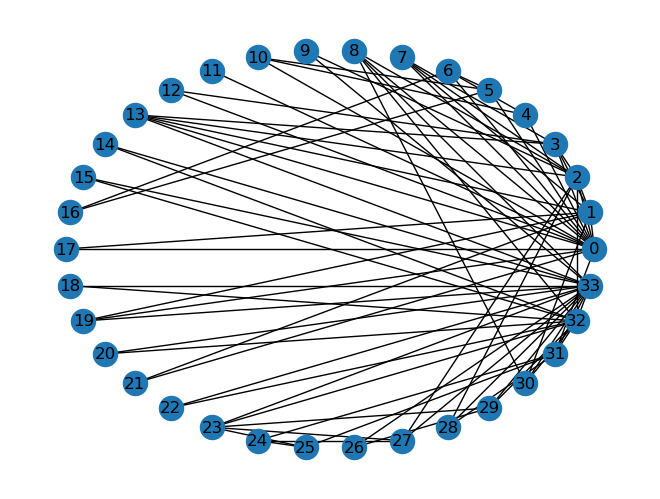

In [8]:
nx.draw_circular(G, with_labels=True)
plt.show()